# TASK - 5 (Exploratory Data Analysis (EDA))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/vikra/OneDrive/Desktop/DA Python projects/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Basic Exploration

#### Dataset Information

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Statistical Summary

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Check Missing Values

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Observation: Titanic dataset usually has missing values in Age, Cabin, Embarked.

## Handle Missing Values

In [9]:
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Univariate Analysis

#### Survival Distribution

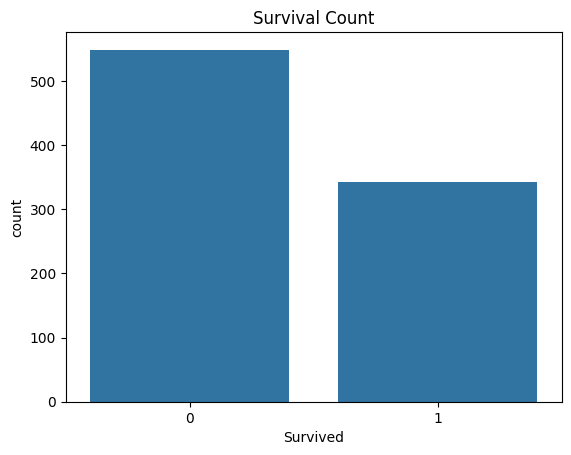

In [10]:
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

#### Passenger Class Distribution

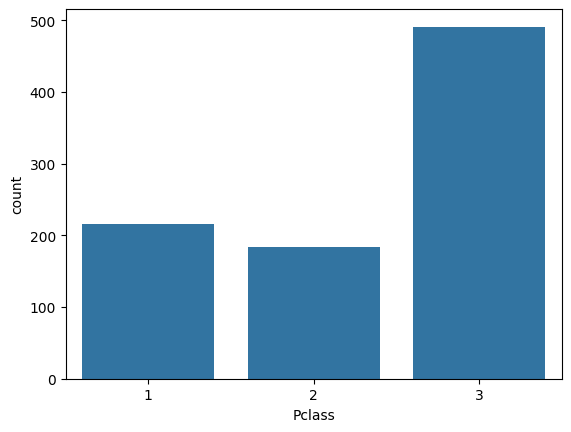

In [11]:
sns.countplot(x="Pclass", data=df)
plt.show()

#### Age Distribution

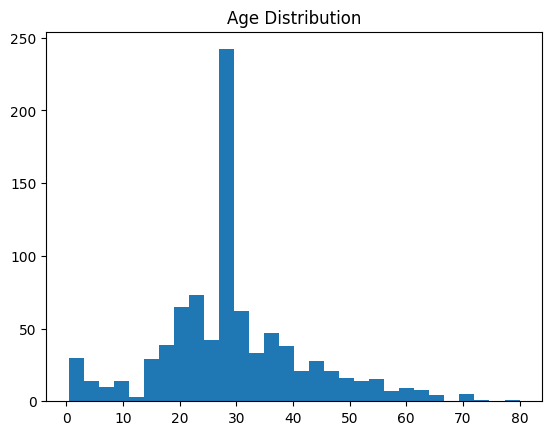

In [12]:
plt.hist(df["Age"], bins=30)
plt.title("Age Distribution")
plt.show()

#### Observation : Most passengers were young adults between 20–40.

## Bivariate Analysis

#### Survival vs Sex

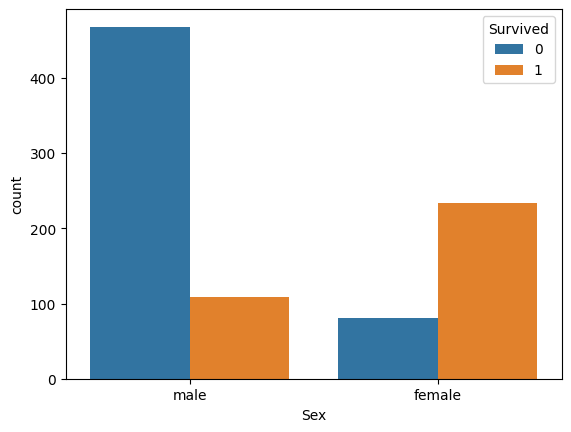

In [13]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.show()

#### Survival vs Pclass

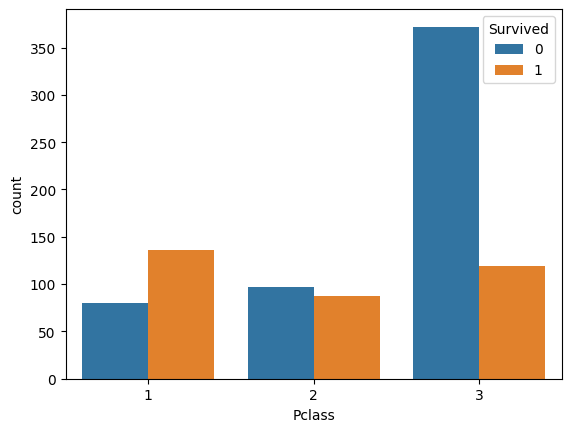

In [14]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.show()

#### Age vs Survival

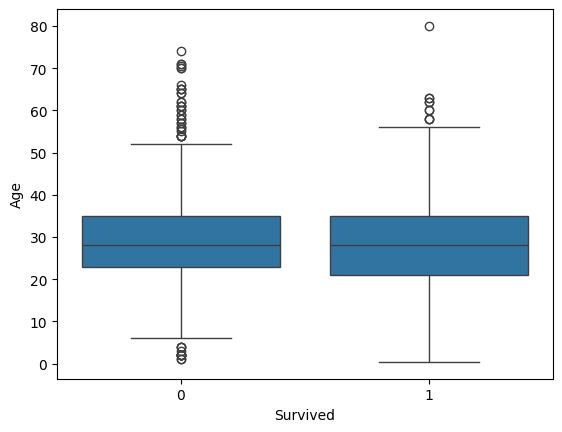

In [15]:
sns.boxplot(x="Survived", y="Age", data=df)
plt.show()

#### Fare vs Survival

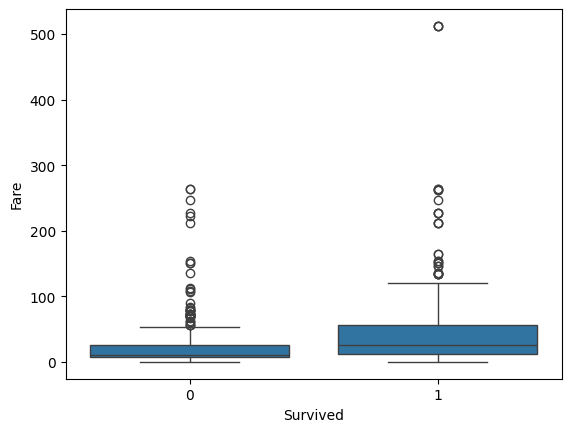

In [16]:
sns.boxplot(x="Survived", y="Fare", data=df)
plt.show()

## Correlation Heatmap

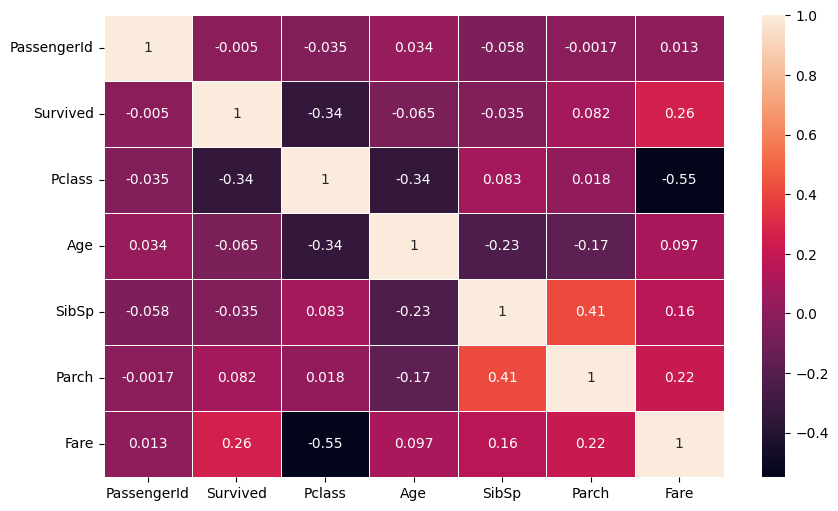

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, linewidths=0.5)
plt.show()

## Pairplot (Multivariate Analysis)

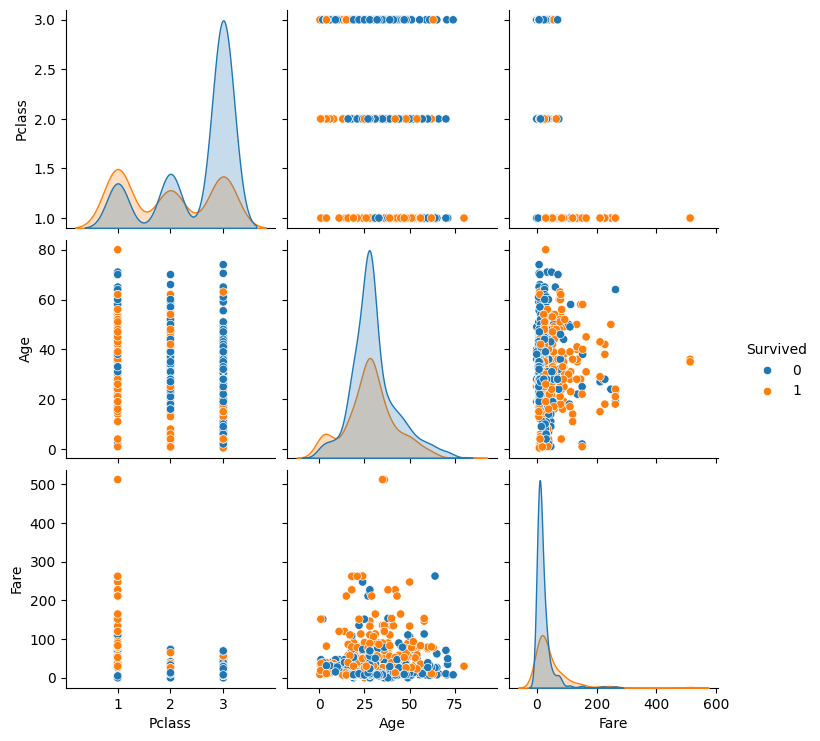

In [19]:
sns.pairplot(df[["Survived", "Pclass", "Age", "Fare"]], hue="Survived")
plt.show()

## Key Insights

## ✔ Females survived more than males
## ✔ Passengers in 1st class had higher survival rates
## ✔ Younger passengers had slightly better survival odds
## ✔ High-fare passengers were more likely to survive
## ✔ Missed cabins cause incomplete analysis